<a href="https://colab.research.google.com/github/ameliachoi/coursera-IBM-data-science/blob/master/coursera_python_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**[Coursera] Data Analysis with Python**
# Section 3. Exploratory Data Analysis

## Table of Contents
1. Import Data from Module
2. Analyzing Individual Feature Patterns using Visualization
3. Descriptive Statistical Analysis
4. Basics of Grouping
5. Correlation and Causation
6. ANOVA

---

### Import Data from Module

In [0]:
# setting
import pandas as pd
import numpy as np

In [0]:
path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

---

### Analyzing Individual Feature Patterns using Visualization

In [0]:
# install seaborn pip
%%capture
! pip install seaborn

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### How to choose the right visualization method?
data type을 먼저 살펴보고, type에 맞는 visualization 필요

In [0]:
# list the data types for each columns
print(df.dtypes)

type `int64`와 `float64`는 상관관계 계산이 가능하다

In [0]:
df.corr()

In [0]:
# example: 'bore', 'stroke', 'compression-ratio', 'horsepower'의 상관관계
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

#### Continuous numerical variables
scatter plot을 이용하여 상관관계 확인 가능함

강한 상관관계 Strong Correlation

In [0]:
# example: the scatterplot between 'engine-size' and 'price'
sns.regplot(x='engine-size', y='price', data=df)
plt.ylim(0,)

In [0]:
df[['engine-size', 'price']].corr()

In [0]:
# example: the scatterplot between 'highway-mpg' and 'price'
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)

In [0]:
df[['highway-mpg', 'price']].corr()

약한 상관관계 Weak Correlation

In [0]:
# example: the scatterplot between 'peak-rpm' and 'price'
sns.regplot(x='peak-rpm', y='price', data=df)

In [0]:
df[['peak-rpm', 'price']].corr()

In [0]:
# example: the scatterplot between 'stroke' and 'price'
sns.regplot(x='stroke', y='price', data=df)

In [0]:
df[['stroke', 'price']].corr()

#### Categorical variables
boxplot을 이용하여 비교 가능함

In [0]:
# example: the boxplot between 'body-style' and 'price'
sns.boxplot(x='body-style', y='price', data=df)

In [0]:
# example: the boxplot between 'engine-location' and 'price'
sns.boxplot(x='engine-location', y='price', data=df)

In [0]:
# example: the boxplot between 'drive-wheels' and 'price'
sns.boxplot(x='drive-wheels', y='price', data=df)

---

### Descriptive Statistical Analysis

#### describe
`describe` function을 사용하면 기본 통계적 정보를 제공함

In [0]:
df.describe()

In [0]:
# object type의 변수도 포함하여 나타낼 때
df.describe(include=['object'])

#### Value Counts
`value_counts`를 이용하면 각 category/variable 별로 갯수 세기가 가능

In [0]:
df['drive-wheels'].value_counts()

In [0]:
# dataframe 형식으로 만들기
df['drive-wheels'].value_counts().to_frame()

In [0]:
# 'drive-wheels'를 'value_counts'로 이름 변경하기
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels':'value_counts'}, inplace=True)
drive_wheels_counts

In [0]:
# index name을 'drive-wheels'로 변경하기
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

In [0]:
# example : 'engine-location'의 value count dataframe 만들기
engine_location_counts = df['engine-location'].value_counts().to_frame()
engine_location_counts

In [0]:
engine_location_counts.rename(columns={'engine-location':'value-counts'}, inplace=True)
engine_location_counts

In [0]:
engine_location_counts.index.name = 'engine-location'
engine_location_counts

---

### Basics of Grouping

#### groupby
`groupby` function은 지정 columns를 기준으로 분류하는 작업을 진행

In [0]:
df['drive-wheels'].unique()

In [0]:
df_group_one = df[['drive-wheels', 'body-style', 'price']]

In [97]:
# grouping result
df_group_one = df_group_one.groupby(['drive-wheels'], as_index=False).mean()
df_group_one # drive-wheels로 category 분류하여 price mean 구함

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [98]:
# grouping test 2
df_gptest = df[['drive-wheels', 'body-style', 'price']]
grouped_test1 = df_gptest.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
grouped_test1 # drive-wheels를 기준으로 category 나눈 뒤, body-style별 price의 mean값 구함

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [99]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels', columns='body-style')
grouped_pivot # 'drive-wheels'를 index로, 'body-style'을 columns로 둔 dataframe 만들기

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  NaN           NaN  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

In [100]:
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  0.0      0.000000  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

In [101]:
# example : find the average 'price' of each car based on 'body-style'
df_group_two = df[['body-style', 'price']]
df_group_two = df_group_two.groupby(['body-style'], as_index=False).mean()
df_group_two

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


#### Variables : Drive Wheels and Body Style vs Price
`heatmap` function을 이용하여 `body-style` vs `price` 비교

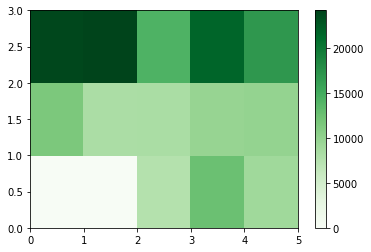

In [102]:
# using the grouped results
plt.pcolor(grouped_pivot, cmap='Greens')
plt.colorbar()
plt.show()

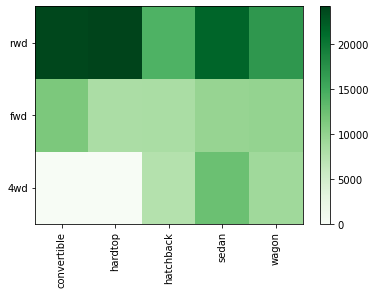

In [103]:
# adding some information into the heatmap

fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='Greens')

# label names
row_labels = grouped_pivot.columns.levels[1] #body-style
col_labels = grouped_pivot.index # drive-wheels

# move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

# insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

# rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

---

### Correlation and Causation

`Correlation` : a measure of the extent of interdependence between variables.

`Causation` : the relationship between cause and effect between two variables.

#### Pearson Correlation

In [104]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


#### P-Value
보통 특정 값을 0.05라고 할 때, 이는 주어진 가설이 맞을 확률이 95%가 된다는 것을 의미한다. 

0.05보다 작을 시 귀무가설(영가설)을 기각함.



In [0]:
# using stats module in the spicy library
from scipy import stats

In [108]:
# wheel-base vs price
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print('The Pearson Correlation Coefficient is', pearson_coef, ' with a P-value of P = ', p_value)

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P =  8.076488270733218e-20


p-value가 0.001보다 작기 때문에, `wheel-base`와 `price` 간의 상관관계 가설은 통계적으로 유의하다. 하지만 선형 관계에서는 0.585 정도로 약한 선형관계를 보인다.

In [109]:
# horsepower vs price
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print('The Pearson Correlation Coefficient is', pearson_coef, ' with a P-value of P = ', p_value)

The Pearson Correlation Coefficient is 0.8095745670036559  with a P-value of P =  6.369057428260101e-48


`horsepower`와 `price`의 상관관계 가설은 통계적으로 유의함.

선형 관계는 0.809으로 강한 선형관계

In [110]:
# length vs price
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print('The Pearson Correlation Coefficient is', pearson_coef, ' with a P-value of P = ', p_value)

The Pearson Correlation Coefficient is 0.6906283804483638  with a P-value of P =  8.016477466159556e-30


In [111]:
# width vs price
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print('The Pearson Correlation Coefficient is', pearson_coef, ' with a P-value of P = ', p_value)

The Pearson Correlation Coefficient is 0.7512653440522673  with a P-value of P =  9.200335510481646e-38


In [112]:
# curb-weight vs price
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print('The Pearson Correlation Coefficient is', pearson_coef, ' with a P-value of P = ', p_value)

The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P =  2.189577238894065e-53


In [113]:
# engine-size vs price
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print('The Pearson Correlation Coefficient is', pearson_coef, ' with a P-value of P = ', p_value)

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P =  9.265491622198389e-64


In [114]:
# bore vs price
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print('The Pearson Correlation Coefficient is', pearson_coef, ' with a P-value of P = ', p_value)

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =  8.049189483935489e-17


In [115]:
# city-mpg vs price
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print('The Pearson Correlation Coefficient is', pearson_coef, ' with a P-value of P = ', p_value)

The Pearson Correlation Coefficient is -0.6865710067844678  with a P-value of P =  2.321132065567641e-29


In [116]:
# highway-mpg vs price
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print('The Pearson Correlation Coefficient is', pearson_coef, ' with a P-value of P = ', p_value)

The Pearson Correlation Coefficient is -0.704692265058953  with a P-value of P =  1.7495471144476358e-31


---

### ANOVA : Analysis of Variance

ANOVA(분산분석)은 통계학에서 두 개 이상 다수의 집단을 비교하고자 할 때

집단 내의 분산, 총평균과 각 집단의 평균의 차이에 의해 생긴

집단 간 분산의 비교를 통해 만들어진 F분포를 이용하여 가설검정을 하는 방법이다.

In [118]:
grouped_test2 = df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [119]:
# obtaining the values of the method group
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [121]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'],
                              grouped_test2.get_group('4wd')['price'])

print('ANOVA results: F = ', f_val, ", P = ", p_val)

ANOVA results: F =  67.95406500780399 , P =  3.3945443577151245e-23


In [123]:
# fwd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])

print('ANOVA results: F = ', f_val, ", P = ", p_val)

ANOVA results: F =  130.5533160959111 , P =  2.2355306355677845e-23


In [124]:
# 4wd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])

print('ANOVA results: F = ', f_val, ", P = ", p_val)

ANOVA results: F =  8.580681368924756 , P =  0.004411492211225333


In [125]:
# 4wd and fwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])

print('ANOVA results: F = ', f_val, ", P = ", p_val)

ANOVA results: F =  0.665465750252303 , P =  0.41620116697845666


`fwd`, `rwd`, `4wd` 3개를 비교할 때, P-value의 경우 0에 가깝고, F-value 값이 높아 강한 상관관계를 보여줌을 알 수 있다.

---

### Conclusion : Important Variables

차 가격 예측 시 중요하게 작용할 변수를 찾아낼 수 있었다.

Continuous numerical variables:
- Length
- Width
- Curb-weight
- Engine-size
- Horsepower
- City-mpg
- Highway-mpg
- Wheel-base
- Bore

Categorical variables:
- Drive-wheels